# 描述性数据分析

## Descriptive Data Analysis
Descriptive techniques often include constructing tables of means and quantiles, measures of dispersion such as variance or standard deviation, and cross-tabulations or "crosstabs" that can be used to examine many disparate hypotheses. Those hypotheses are often about observed differences across subgroups. Specialized descriptive techniques are used to measure segregation, discrimination, and inequality. Discrimination is often measured using audit studies or decomposition methods. More segregation by type or inequality of outcomes need not be wholly good or bad in itself, but it is often considered a marker of unfair social processes; accurate measurement of the levels across time and space is a prerequisite to understanding those processes.

## 1. 导入模块

| Package      | Usage | Tutorial Link |
| ----------- | ----------- |----------------|
| pandas      | data analysis       | https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html|
| numpy   | numerical calculation        | https://numpy.org/devdocs/user/quickstart.html |
| matplotlib | plot images | https://matplotlib.org/tutorials/index.html|
| seaborn | data visualization | https://seaborn.pydata.org/tutorial.html |

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# basic python packages
import os
import datetime

In [3]:
# plotting in jupyter notebook
from IPython.display import Image
from IPython.core.display import HTML 

In [4]:
#load an image to test
img_url= "https://news.bitcoin.com/wp-content/uploads/2020/09/market-outlook-bitcoin-breaks-11k-whales-refuse-to-sell-downside-risk-remains.jpg"
Image(url=img_url, width = 600, height = 300)

## 2. 数据

下载链接并解压到当前文件夹：https://www.kaggle.com/mczielinski/bitcoin-historical-data


In [5]:
# load data file 
data_file = ""
for file in os.listdir():
    if file.endswith(".csv"):
        data_file = file
        break

In [6]:
# 用pandas读取数据
bitcoin_data = pd.read_csv(data_file)

In [7]:
# 显示表头
bitcoin_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 显示数据信息
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 279.1 MB


In [9]:
# 换算时间并增添列
bitcoin_data["Datetime"] = [datetime.datetime.fromtimestamp(each_time_int) for each_time_int in bitcoin_data['Timestamp']]

In [10]:
bitcoin_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 02:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 02:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 02:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 02:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 02:56:00


In [11]:
# 去掉缺失数据
bitcoin_data.dropna(inplace=True)
bitcoin_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 02:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 10:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 11:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 12:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2011-12-31 23:16:00
...,...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779,2020-09-13 19:56:00
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396,2020-09-13 19:57:00
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283,2020-09-13 19:58:00
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651,2020-09-13 19:59:00


In [12]:
# 显示数据大小
bitcoin_data.shape

(3330541, 9)

## 3. 数据分析

### 3.1 相关性分析

分析数据的不同变量之间的相关关系

In [13]:
# 获取相关系数
corr = bitcoin_data.corr()
print(corr)
# mask上三角矩阵
mask = np.triu(np.ones_like(corr, dtype=bool))

                   Timestamp      Open      High       Low     Close  \
Timestamp           1.000000  0.807947  0.807782  0.808162  0.807950   
Open                0.807947  1.000000  0.999999  0.999998  0.999998   
High                0.807782  0.999999  1.000000  0.999997  0.999999   
Low                 0.808162  0.999998  0.999997  1.000000  0.999999   
Close               0.807950  0.999998  0.999999  0.999999  1.000000   
Volume_(BTC)       -0.100298 -0.064290 -0.064048 -0.064595 -0.064326   
Volume_(Currency)   0.191360  0.289368  0.289891  0.288706  0.289291   
Weighted_Price      0.807974  0.999999  0.999999  0.999999  0.999999   

                   Volume_(BTC)  Volume_(Currency)  Weighted_Price  
Timestamp             -0.100298           0.191360        0.807974  
Open                  -0.064290           0.289368        0.999999  
High                  -0.064048           0.289891        0.999999  
Low                   -0.064595           0.288706        0.999999  
Close 

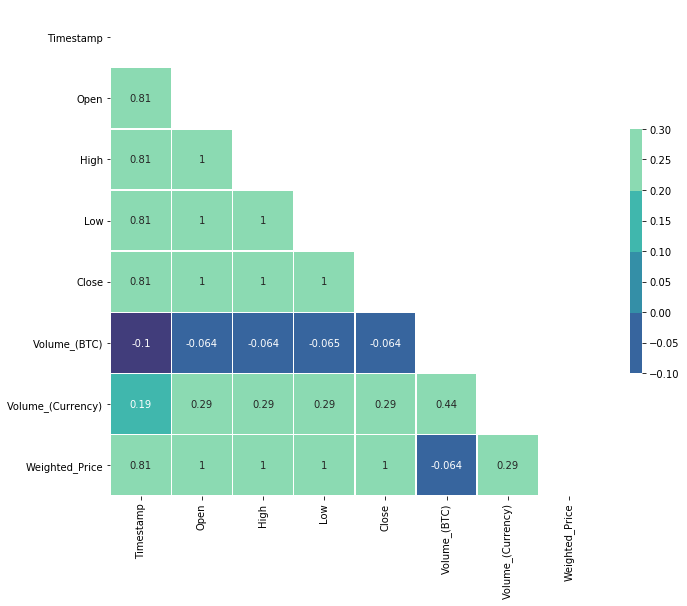

In [14]:
# 设置画布
f, ax = plt.subplots(figsize=(11, 9))
# 选择调色板
cmap = sns.color_palette("mako")
# 画图
sns.heatmap(corr, mask=mask, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5})
plt.show()



1、The daily opening and closing prices have a positive correlation between the highest and lowest prices, and the correlation coefficient is relatively large, indicating that these prices have a strong trend of changing in the same direction. At the same time, the prices are generally getting higher and higher as time goes by.

2、The daily trading volume of BTC is negatively correlated with the opening and closing prices, the highest and lowest prices. However, as the absolute value of the negative correlation coefficient is small, such a change is not obvious. In addition,there is a negative correlation between the trading volume of BTC and the time, indicating that the overall trading volume of BTC is getting lower and lower.

3、Daily turnover of cash presents positive correlation relationship with the opening and closing prices,the highest and lowest prices. Moreover,it is positively related to the trading volume of BTC and the time.

    
    

### 3.2 时间序列

画图：变量随时间的变化

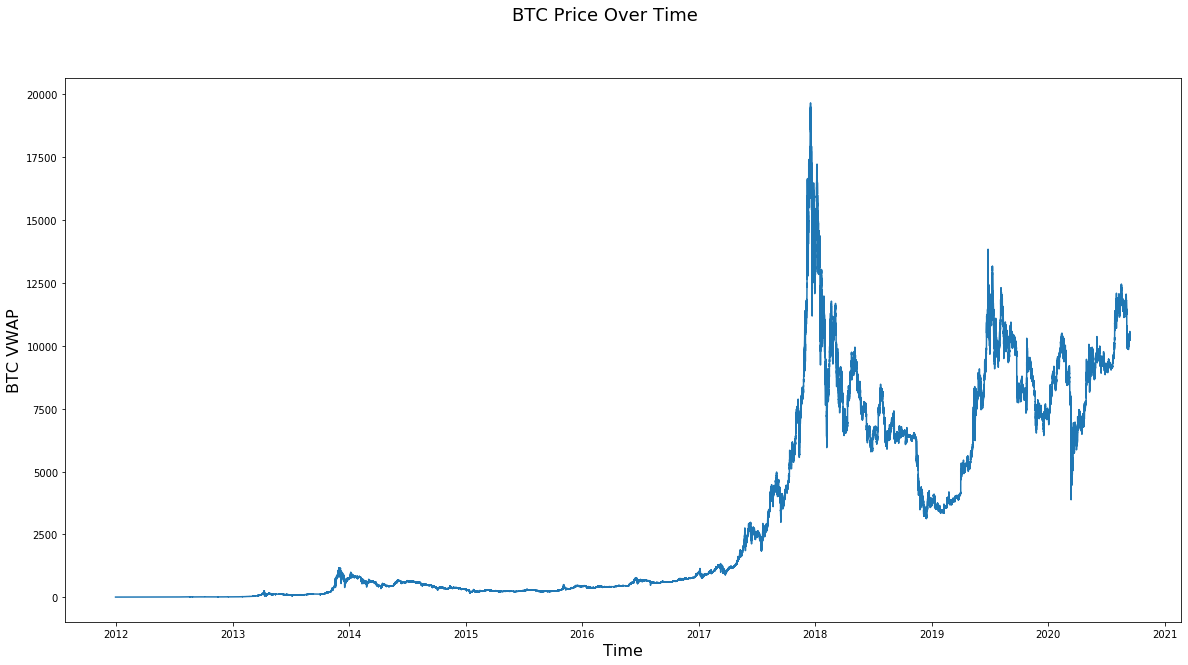

In [15]:
# 获取时间和价格
data_time = bitcoin_data['Datetime'].values 
weighted_price = bitcoin_data['Weighted_Price'].values

# 设置画布
plt.figure(figsize=(20,10))
plt.plot(data_time,weighted_price)

# 其他参数
plt.xlabel('Time',fontsize=16)
plt.ylabel('BTC VWAP',fontsize=16)
plt.suptitle('BTC Price Over Time',fontsize=18)

plt.show()



    
1、The price of Bitcoin showed a relatively stable trend from 2012 to 2017, with a small rise around 2014.

2、The price surged quickly in 2018 but also declined sharply that year.

3、From 2019 to now, the price of Bitcoin has been in a stage of severe fluctuation, but it is generally higher than the price before 2018.
   

### 3.2 数据聚合（Groupby）

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

接下来的例子展示了讲数据关于年份和月份的聚合：

In [16]:
# 创建新列
bitcoin_data['Year'] = [e.year for e in bitcoin_data['Datetime']]
bitcoin_data['Month'] = [e.month for e in bitcoin_data['Datetime']]

In [17]:
bitcoin_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Year,Month
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 02:52:00,2011,12
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 10:50:00,2011,12
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 11:59:00,2011,12
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 12:00:00,2011,12
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2011-12-31 23:16:00,2011,12


In [18]:
# 聚合数据，并取平均
year_month_data = bitcoin_data.groupby(['Year','Month']).mean()

In [19]:
# 重新整理数据
year_month_data.reset_index(inplace=True)

In [20]:
year_month_data

,Year,Month,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011,12,1.325351e+09,4.488000,4.502000,4.488000,4.502000,19.363976,86.439900,4.493282
1,2012,1,1.326822e+09,6.348920,6.352520,6.344740,6.349680,4.036837,25.204816,6.349487
2,2012,2,1.329322e+09,5.228675,5.230103,5.225525,5.226988,8.298542,42.157842,5.226922
3,2012,3,1.331923e+09,4.985331,4.986553,4.982411,4.983667,15.259781,76.822960,4.984240
4,2012,4,1.334616e+09,4.994413,4.995679,4.993016,4.994321,21.663379,108.100953,4.994333
...,...,...,...,...,...,...,...,...,...,...
101,2020,5,1.589641e+09,9240.107736,9245.807833,9234.481374,9240.222054,8.811888,81332.533694,9240.444294
102,2020,6,1.592279e+09,9457.368861,9460.783623,9453.965944,9457.474065,4.973189,47287.815565,9457.626939
103,2020,7,1.594931e+09,9570.338425,9573.343567,9567.610613,9570.623876,4.620188,46033.117120,9570.811873
104,2020,8,1.597589e+09,11638.524953,11643.813016,11634.259034,11638.898618,4.390193,51063.388810,11639.601659


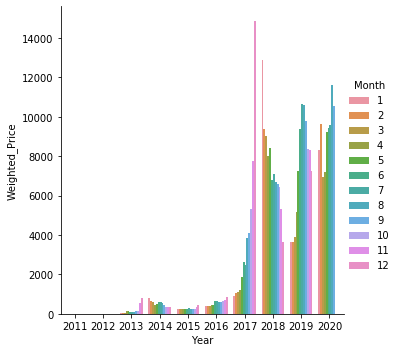

In [21]:
# 画图
sns.catplot(x="Year", y="Weighted_Price", hue="Month", kind="bar", data=year_month_data)

 Group Bitcoin prices by weekday 

In [24]:
# write your code:
bitcoin_data['weekday'] =[i.weekday for i in bitcoin_data['Datetime']]

weekday_data=bitcoin_data.groupby(['weekday']).mean()

weekday_data.reset_index(inplace=True)
weekday_data

TypeError: '<' not supported between instances of 'builtin_function_or_method' and 'builtin_function_or_method'